import libs

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
from utils import load_table, select_rename_columns, extract_year, save_table, get_date_range, get_nulls, get_nans



import the data and quick column print

In [9]:
df = pd.read_csv("cleaned_data\\joined_data.csv", delimiter=',')

#print all columns in df
print(df.columns)

Index(['CalendarMonth', 'industry', 'PIB_par_industrie', 'structure_type',
       'work_type', 'inverstissement_construction', 'new_housing_price_index',
       'indice_de_prix_logements', 'taux_hypothecaire_terme_5ans', 'rate_type',
       'interest_rate_value'],
      dtype='object')


plot interest rates for prime rate, short term bonds and long term bonds

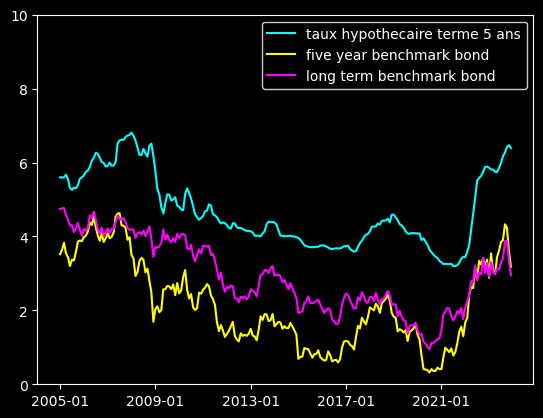

In [11]:
def plot_interest_rate(save=False):
    # taux_hypothecaire_terme_5ans over time, and take out the nulls
    df_taux_hypothecaire_terme_5ans = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans.dropna().drop_duplicates()
    df_interest = df[['CalendarMonth', "interest_rate_value", "rate_type"]]
    # print all unique values in df_interest['rate_type']
    long_term_benchmark_bond = df_interest[df_interest['rate_type'] == "Selected Government of Canada benchmark bond yields: long term"].dropna().drop_duplicates()
    five_year_benchmark_bond = df_interest[df_interest['rate_type'] == "Selected Government of Canada benchmark bond yields: 5 year"].dropna().drop_duplicates()
    # set the style to dark background
    plt.style.use('dark_background')
    # plot the data from df_taux_hypothecaire_terme_5ans
    plt.plot(df_taux_hypothecaire_terme_5ans['CalendarMonth'], df_taux_hypothecaire_terme_5ans['taux_hypothecaire_terme_5ans'], label='taux hypothecaire terme 5 ans', color='cyan')
    # plot the data from five_year_benchmark_bond
    plt.plot(five_year_benchmark_bond['CalendarMonth'], five_year_benchmark_bond['interest_rate_value'], label='five year benchmark bond', color='yellow')
    # plot the data from long_term_benchmark_bond
    plt.plot(long_term_benchmark_bond['CalendarMonth'], long_term_benchmark_bond['interest_rate_value'], label='long term benchmark bond', color='magenta')
    plt.ylim(0, 10)  # set the limits of y-axis from 0 to 10
    # get the current locations and labels
    locs, labels = plt.xticks()
    # set labels to display only one out of every 24 months and rotate them vertically
    plt.xticks(locs[::48], df_taux_hypothecaire_terme_5ans['CalendarMonth'][::48], color='white')
    # set the color of y-axis labels to white
    plt.yticks(color='white')
    # add a legend with white text
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
    # display the plot
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')
    
    
plot_interest_rate()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2588\2585667711.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), color='yellow')


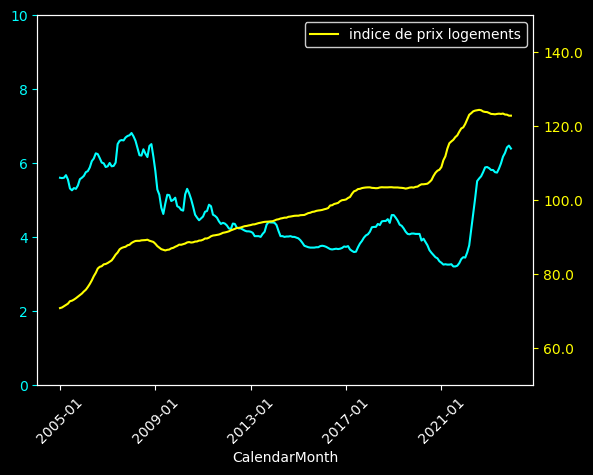

In [12]:
def plot_new_price_index_and_rate(save=False):
    df_taux_hypothecaire_terme_5ans = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans.dropna().drop_duplicates()
    df_price_index = df[['CalendarMonth', "indice_de_prix_logements"]]
    df_price_index = df_price_index.dropna().groupby('CalendarMonth').mean().reset_index()
    fig, ax1 = plt.subplots()
    fig.patch.set_facecolor('black')
    ax2 = ax1.twinx()
    ax1.plot(df_taux_hypothecaire_terme_5ans['CalendarMonth'], df_taux_hypothecaire_terme_5ans['taux_hypothecaire_terme_5ans'], label='taux hypothecaire terme 5 ans', color='cyan')
    ax2.plot(df_price_index['CalendarMonth'], df_price_index['indice_de_prix_logements'], label='indice de prix logements', color='yellow')
    ax1.set_ylim(0, 10)
    ax2.set_ylim(50, 150)
    ax1.tick_params(axis='y', colors='cyan')
    ax2.tick_params(axis='y', colors='yellow')
    ax1.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='x', colors='white')
    ax2.set_yticklabels(ax2.get_yticks(), color='yellow')
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
    ax1.set_facecolor('black')
    ax2.set_facecolor('black')
    ticks = ax1.get_xticks()
    ax1.set_xticks(ticks[::48])
    ax1.set_xticklabels(df_taux_hypothecaire_terme_5ans['CalendarMonth'][::48], rotation=45, color='white')
    ax1.set_xlabel('CalendarMonth', color='white')
    for spine in ax1.spines.values():
        spine.set_edgecolor('white')
    for spine in ax2.spines.values():
        spine.set_edgecolor('white')
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')

plot_new_price_index_and_rate()

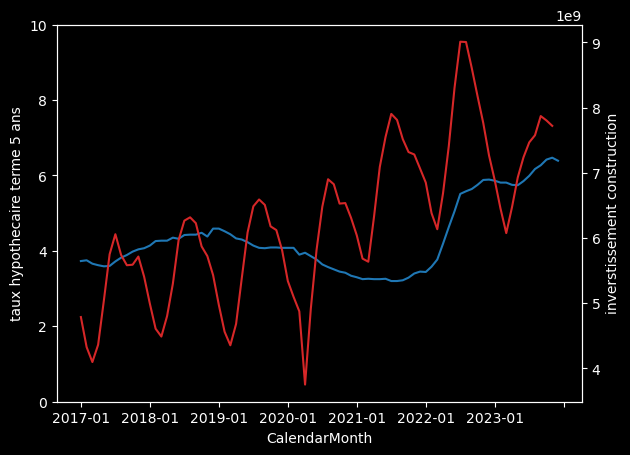

In [14]:
def plot_inv_and_rate(save=False):
    df_taux_hypothecaire_terme_5ans = df[['CalendarMonth', 'taux_hypothecaire_terme_5ans']]
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans.dropna().drop_duplicates()
    df_taux_hypothecaire_terme_5ans = df_taux_hypothecaire_terme_5ans[df_taux_hypothecaire_terme_5ans['CalendarMonth'] >= '2017-01']
    df_inv = df[["CalendarMonth", "inverstissement_construction"]]
    df_inv = df_inv.dropna().groupby('CalendarMonth').mean().reset_index()

    fig, ax1 = plt.subplots()

    fig.patch.set_facecolor('black')  # set background color to black
    ax1.set_facecolor('black')  # set the plot area background color to black

    color = 'tab:blue'
    ax1.set_xlabel('CalendarMonth', color='white')
    ax1.set_ylabel('taux hypothecaire terme 5 ans', color='white')
    ax1.plot(df_taux_hypothecaire_terme_5ans['CalendarMonth'], df_taux_hypothecaire_terme_5ans['taux_hypothecaire_terme_5ans'], color=color)
    ax1.tick_params(axis='y', labelcolor='white')
    ax1.set_ylim([0,10])  # set y scale for taux_hypothecaire_terme_5ans

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('inverstissement construction', color='white')  # we already handled the x-label with ax1
    ax2.plot(df_inv['CalendarMonth'], df_inv['inverstissement_construction'], color=color)
    ax2.tick_params(axis='y', labelcolor='white')

    ax1.spines['bottom'].set_color('white')
    ax1.spines['top'].set_color('white') 
    ax1.spines['right'].set_color('white')
    ax1.spines['left'].set_color('white')

    ax2.spines['bottom'].set_color('white')
    ax2.spines['top'].set_color('white') 
    ax2.spines['right'].set_color('white')
    ax2.spines['left'].set_color('white')

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(12))  # set x ticks to appear every 12 months
    ax1.tick_params(axis='x', colors='white')  # set x tick labels to white

    fig.tight_layout(rect=[0, 0.03, 1, 1])  # adjust the bottom margin
    if save == False:
        return plt.show()
    else:
        return plt.savefig('interest_rates.png', dpi=300, bbox_inches='tight')
    
plot_inv_and_rate()

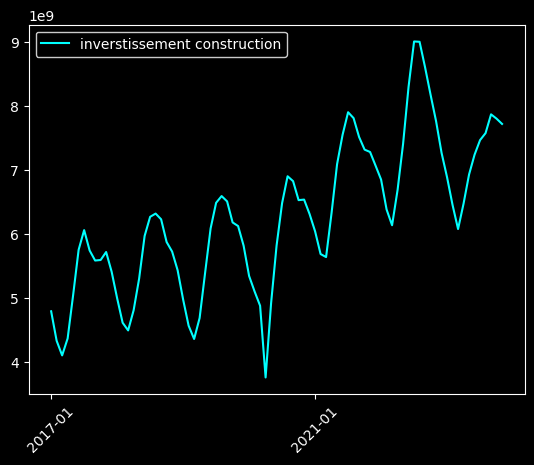

In [16]:
# from df, 


In [40]:
test_df = load_table("data\stats_can\investissement_construction.csv", delimiter=";")
#print all unique values in GÉO, Type de structure, Type de travaux
# print(test_df['Type de structure'].unique())
# print(test_df['Type de travaux'].unique())
#get the count the number of records by "PÉRIODE DE RÉFÉRENCE" and "Type de travaux"
# print(test_df.groupby(["PÉRIODE DE RÉFÉRENCE", "Type de structure", "Type de travaux"]).size())
# print(test_df)
# i want to create a feature wich is the avergae of all values for all "type de travaux" and "type de structure" for each "PÉRIODE DE RÉFÉRENCE"
test_df["avg_agg_investment"] = test_df.groupby(["PÉRIODE DE RÉFÉRENCE"])["VALEUR"].transform('mean')
print(test_df.head())


  PÉRIODE DE RÉFÉRENCE     GÉO           DGUID  \
0              2017-01  Canada  2021A000011124   
1              2017-02  Canada  2021A000011124   
2              2017-03  Canada  2021A000011124   
3              2017-04  Canada  2021A000011124   
4              2017-05  Canada  2021A000011124   

                       Type de structure          Type de travaux  \
0  Résidentiel et non résidentiel, total  Types de travaux, total   
1  Résidentiel et non résidentiel, total  Types de travaux, total   
2  Résidentiel et non résidentiel, total  Types de travaux, total   
3  Résidentiel et non résidentiel, total  Types de travaux, total   
4  Résidentiel et non résidentiel, total  Types de travaux, total   

             Désaisonnalisation UNITÉ DE MESURE  \
0  Non désaisonnalisé - courant         Dollars   
1  Non désaisonnalisé - courant         Dollars   
2  Non désaisonnalisé - courant         Dollars   
3  Non désaisonnalisé - courant         Dollars   
4  Non désaisonnalisé - coura